<a href="https://colab.research.google.com/github/AlfredSamuel-7/AlfredSamuel-7/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv.crdownload to creditcard.csv.crdownload


In [2]:
!pip install pandas numpy matplotlib scikit-learn


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/creditcard.csv.crdownload")  # Adjust path if using Google Drive

# Display first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
# Check for missing values
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

# Drop the original Amount and Time columns
df.drop(["Amount", "Time"], axis=1, inplace=True)

# Check the dataset after normalization
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.482873
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.334272
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.756668
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.337607
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.040014


In [12]:
# Features (X) - all columns except 'Class'
X = df.drop(["Class"], axis=1)

# Target (Y) - 'Class' column (0 = Genuine, 1 = Fraud)
Y = df["Class"]


In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into training (70%) and testing (30%)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42)

# Check dataset shapes
print("Shape of train_X:", train_X.shape)
print("Shape of test_X:", test_X.shape)


Shape of train_X: (8165, 29)
Shape of test_X: (3500, 29)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [16]:
print(test_Y.isnull().sum())  # Check if test_Y has NaN values


1


In [18]:
test_Y = test_Y.dropna()
test_X = test_X.loc[test_Y.index]  # Ensure matching indices


In [20]:
test_Y.fillna(test_Y.mode()[0], inplace=True)


In [21]:
print(test_Y.isnull().sum())  # Should print 0


0


In [19]:
# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

# Make predictions on the test set
predictions_dt = decision_tree.predict(test_X)

# Get accuracy score for Decision Tree
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Accuracy Score:", decision_tree_score)


Decision Tree Accuracy Score: 99.88568162332095


In [22]:
# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_Y)

# Make predictions on the test set
predictions_rf = random_forest.predict(test_X)

# Get accuracy score for Random Forest
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Accuracy Score:", random_forest_score)


Random Forest Accuracy Score: 99.9142612174907


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [24]:
def metrics(actuals, predictions, model_name):
    print(f"\n🔹 {model_name} Performance Metrics:")
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(actuals, predictions))


In [25]:
metrics(test_Y, predictions_dt, "Decision Tree")



🔹 Decision Tree Performance Metrics:
Accuracy: 0.99886
Precision: 0.88235
Recall: 0.88235
F1-score: 0.88235

Confusion Matrix:
[[3480    2]
 [   2   15]]


In [26]:
metrics(test_Y, predictions_rf, "Random Forest")



🔹 Random Forest Performance Metrics:
Accuracy: 0.99914
Precision: 0.93750
Recall: 0.88235
F1-score: 0.90909

Confusion Matrix:
[[3481    1]
 [   2   15]]


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


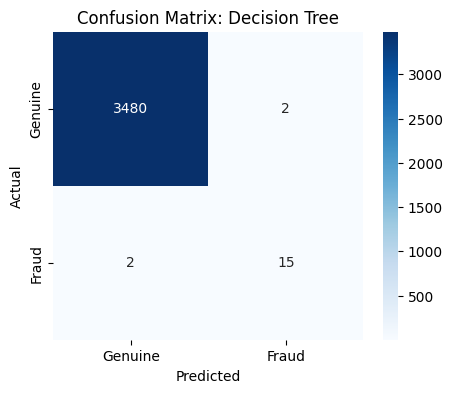

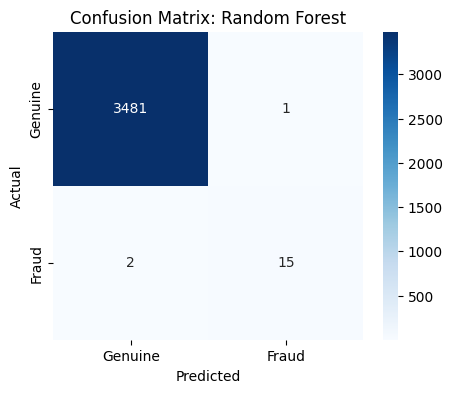

In [28]:
def plot_confusion_matrix(actuals, predictions, model_name):
    cm = confusion_matrix(actuals, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Plot for Decision Tree
plot_confusion_matrix(test_Y, predictions_dt, "Decision Tree")

# Plot for Random Forest
plot_confusion_matrix(test_Y, predictions_rf, "Random Forest")


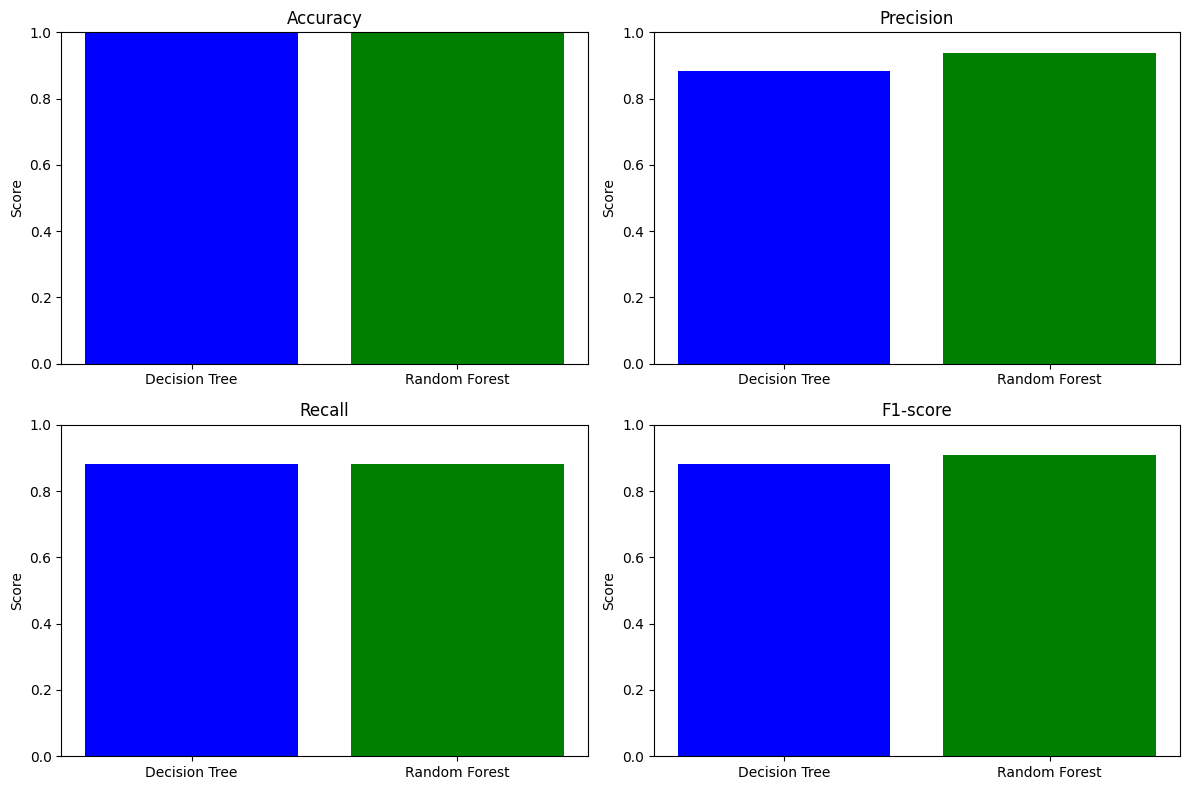

In [29]:
# Get performance scores
models = ["Decision Tree", "Random Forest"]
accuracies = [accuracy_score(test_Y, predictions_dt), accuracy_score(test_Y, predictions_rf)]
precisions = [precision_score(test_Y, predictions_dt), precision_score(test_Y, predictions_rf)]
recalls = [recall_score(test_Y, predictions_dt), recall_score(test_Y, predictions_rf)]
f1_scores = [f1_score(test_Y, predictions_dt), f1_score(test_Y, predictions_rf)]

# Plot comparison bar chart
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = [accuracies, precisions, recalls, f1_scores]
titles = ["Accuracy", "Precision", "Recall", "F1-score"]

for i in range(4):
    ax[i].bar(models, metrics[i], color=['blue', 'green'])
    ax[i].set_title(titles[i])
    ax[i].set_ylim(0, 1)  # Set y-axis limit between 0 and 1
    ax[i].set_ylabel("Score")

plt.tight_layout()
plt.show()


In [31]:
import numpy as np


In [33]:
print("Number of features in train_X:", train_X.shape[1])


Number of features in train_X: 29


In [35]:

new_transaction = pd.DataFrame([test_X.iloc[0]], columns=test_X.columns)

# Predicting the model
is_fraud = random_forest.predict(new_transaction)

# Print result
print("🚨 Fraudulent Transaction!" if is_fraud[0] == 1 else "✅ Genuine Transaction")


✅ Genuine Transaction
